In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sbn 

In [2]:
res = pd.read_csv('../output/from_exacloud/gnn_hparam_tuning/hparam_test_results.csv')
res.head() 

,lr,wd,channels,layers,batch_size,heads,norm,conv,nonlin,dropout,...,test_Top1,test_Top3,test_Top10,test_Top100,test_avg_AUC,test_avg_AP,test_avg_Brier,test_ECE,test_uid,uid
0,0.005,1.000000e-06,8,3,10,1,layer,gat,gelu,0.1,...,0.015432,0.049383,0.145062,0.552469,0.971593,0.109489,0.000185,0.000105,84fedcda-b73b-4bac-8237-59d7efe51dd5,84fedcda-b73b-4bac-8237-59d7efe51dd5
1,0.005,1.000000e-07,8,3,5,4,layer,gat,elu,0.1,...,0.067901,0.126543,0.262346,0.697531,0.989334,0.218841,0.000183,0.000104,23087da9-2099-4f01-9d64-aad3502369ca,23087da9-2099-4f01-9d64-aad3502369ca
2,0.005,1.000000e-06,16,3,10,4,layer,gat,gelu,0.0,...,0.027778,0.064815,0.179012,0.648148,0.986988,0.133928,0.000185,0.000113,eabd9f50-7fa2-442e-8928-ec562affa95e,eabd9f50-7fa2-442e-8928-ec562affa95e
3,0.005,1.000000e-08,8,3,5,2,layer,gat,mish,0.1,...,0.070988,0.151235,0.277778,0.746914,0.995121,0.242185,0.000183,0.000106,7ed4031e-d868-4ffd-b015-5e595817ae03,7ed4031e-d868-4ffd-b015-5e595817ae03
4,0.010,1.000000e-08,8,3,5,1,layer,gat,gelu,0.1,...,0.000000,0.021605,0.080247,0.466049,0.980084,0.050728,0.000185,0.000086,10f3e4fb-73e5-49dd-a280-dcdc118e499d,10f3e4fb-73e5-49dd-a280-dcdc118e499d


In [4]:
res.columns

Index(['lr', 'wd', 'channels', 'layers', 'batch_size', 'heads', 'norm', 'conv',
       'nonlin', 'dropout', 'edge_dim', 'checkpoint', 'residual', 'bias',
       'remove_relation_idx', 'num_workers', 'n_epochs', 'val_lr', 'val_wd',
       'val_channels', 'val_layers', 'val_batch_size', 'val_heads', 'val_norm',
       'val_conv', 'val_nonlin', 'val_dropout', 'val_edge_dim',
       'val_checkpoint', 'val_residual', 'val_bias', 'val_remove_relation_idx',
       'val_num_workers', 'val_n_epochs', 'val_MRR', 'val_Top1', 'val_Top3',
       'val_Top10', 'val_Top100', 'val_avg_AUC', 'val_avg_AP', 'val_avg_Brier',
       'val_ECE', 'val_uid', 'test_lr', 'test_wd', 'test_channels',
       'test_layers', 'test_batch_size', 'test_heads', 'test_norm',
       'test_conv', 'test_nonlin', 'test_dropout', 'test_edge_dim',
       'test_checkpoint', 'test_residual', 'test_bias',
       'test_remove_relation_idx', 'test_num_workers', 'test_n_epochs',
       'test_MRR', 'test_Top1', 'test_Top3', 'test_Top10

In [19]:
res.sort_values('val_MRR', ascending=False)[['lr', 'wd', 'channels', 'layers', 'batch_size', 'heads', 'norm', 'conv',
       'nonlin', 'dropout', 'edge_dim', 'residual', 'val_MRR', 'val_avg_AUC']].head()#.style.hide()

,lr,wd,channels,layers,batch_size,heads,norm,conv,nonlin,dropout,edge_dim,residual,val_MRR,val_avg_AUC
49,0.001,1.000000e-07,12,4,5,2,layer,gat,mish,0.1,6,True,0.174691,0.984053
69,0.005,1.000000e-07,12,4,10,4,layer,gat,mish,0.0,2,True,0.169609,0.978447
32,0.001,1.000000e-07,12,4,5,4,layer,gat,elu,0.0,2,True,0.165117,0.983612
30,0.010,0.000000e+00,16,4,5,2,layer,gat,elu,0.0,6,True,0.153727,0.983938
5,0.001,0.000000e+00,12,3,5,4,layer,gat,gelu,0.0,6,True,0.151372,0.985462


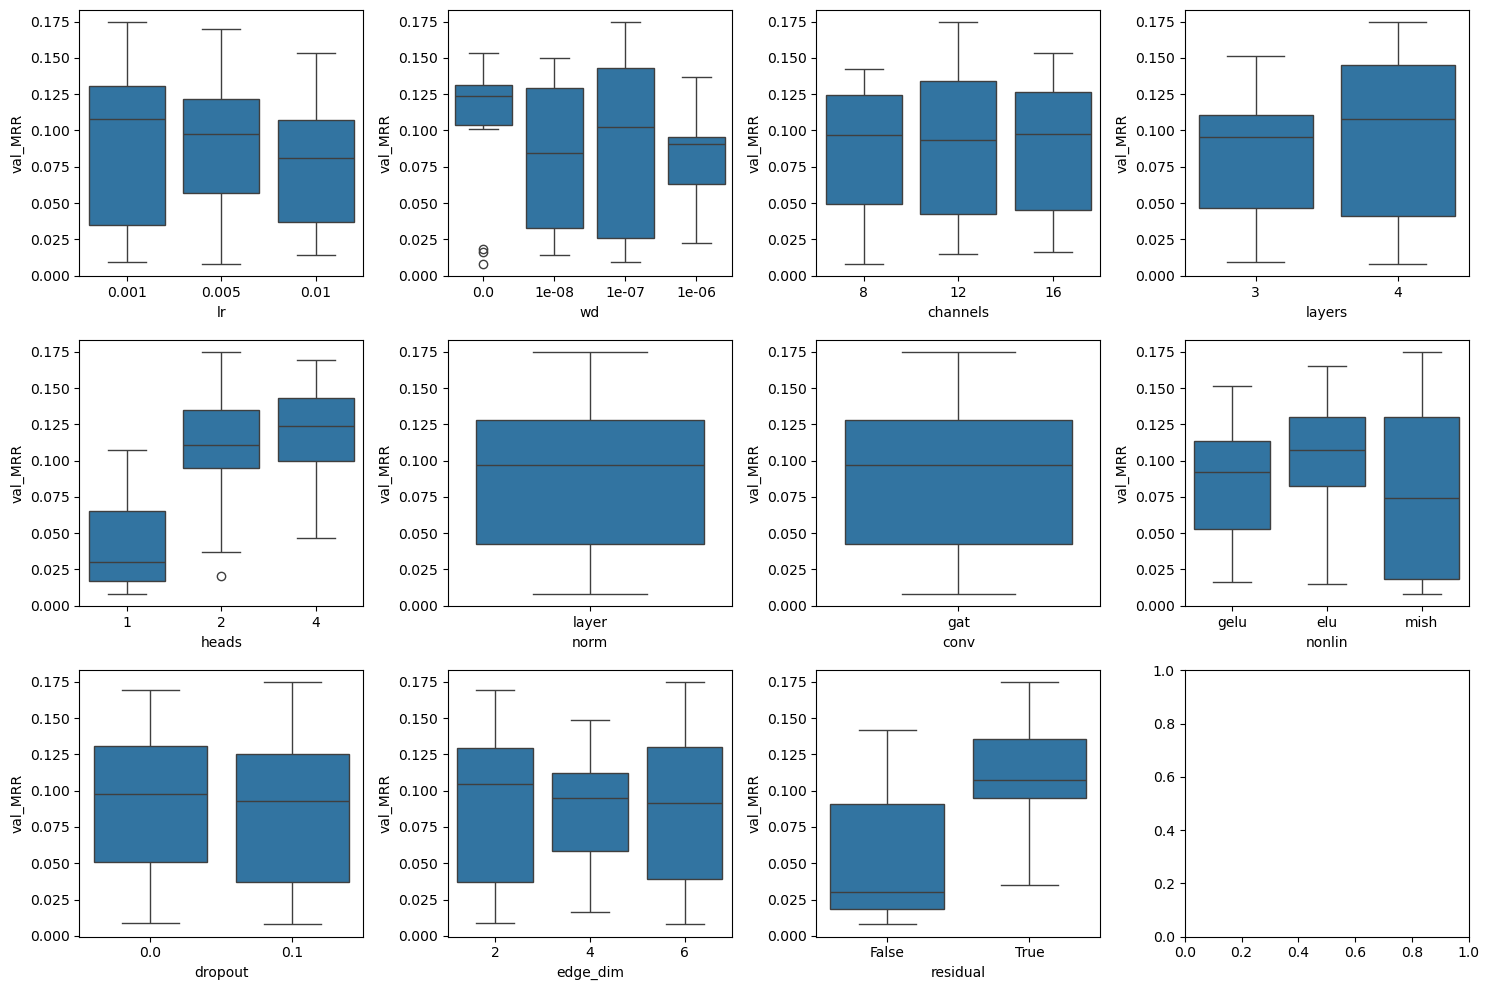

In [16]:
f,axes = plt.subplots(3,4, figsize=(15,10))
sbn.boxplot(data=res, x='lr', y='val_MRR', ax=axes[0, 0])
sbn.boxplot(data=res, x='wd', y='val_MRR', ax=axes[0, 1])
sbn.boxplot(data=res, x='channels', y='val_MRR', ax=axes[0, 2])
sbn.boxplot(data=res, x='layers', y='val_MRR', ax=axes[0, 3])
sbn.boxplot(data=res, x='heads', y='val_MRR', ax=axes[1, 0])
sbn.boxplot(data=res, x='norm', y='val_MRR', ax=axes[1, 1])
sbn.boxplot(data=res, x='conv', y='val_MRR', ax=axes[1, 2])
sbn.boxplot(data=res, x='nonlin', y='val_MRR', ax=axes[1, 3])
sbn.boxplot(data=res, x='dropout', y='val_MRR', ax=axes[2, 0])
sbn.boxplot(data=res, x='edge_dim', y='val_MRR', ax=axes[2, 1])
sbn.boxplot(data=res, x='residual', y='val_MRR', ax=axes[2, 2])
plt.tight_layout()
plt.show()